## The Sparks Foundation

### Internship Task 1

#### Author: Pranoy G Bhadran



### To Predict the percentage of a student on the basis of number of hours studied 

### Steps in Bulding a Multiple Linear Regression Model:

#### 1: Data Quality Assessment

#### 2: Data Visualization

#### 3: Data Preparation

#### 4: Data Modelling and Evaluation

##### a. Importing the dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing nexessary libraries required

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Importing the dataset and reading the data
#stored it as 'marks'

marks= pd.read_csv("student_scores - student_scores.csv")
marks.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
marks.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [32]:
#checking the number rows and columns

marks.shape

(25, 2)

In [6]:
#checking the datatypes of each columns

marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [30]:
#checking the number of nulls in the dataset
marks.isnull().sum()

Hours     0
Scores    0
dtype: int64

###### No null values are found in the dataset

In [7]:
# checking the trend of the values

marks.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### b. Visualization of data

###### Univariate Analysis

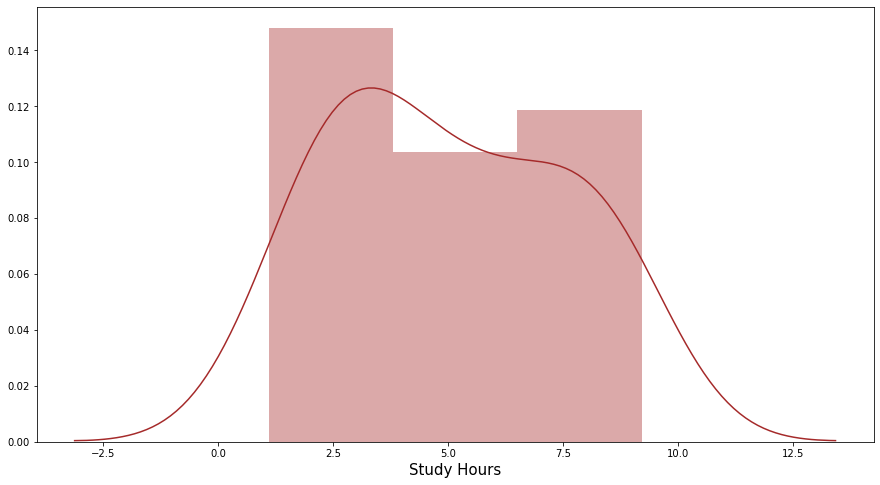

In [40]:
#analysing the data on hours column

#plotting a seaborn distplot

plt.figure(figsize=(15,8))
sns.distplot(marks['Hours'], color='brown')
plt.xlabel('Study Hours',fontsize=15)
plt.show()

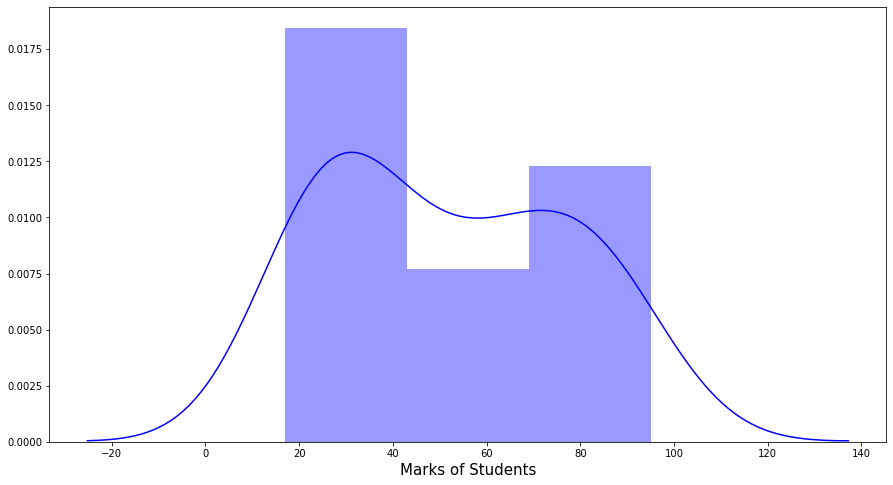

In [41]:
#analysing the data on Scores column

#plotting a seaborn distplot

plt.figure(figsize=(15,8))
sns.distplot(marks['Scores'],color='blue')
plt.xlabel('Marks of Students',fontsize=15)
plt.show()

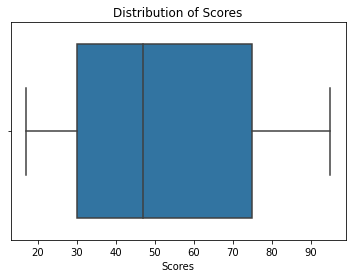

In [59]:
#Checking the outliers in each feature

#plotting a boxplot using seaborn

sns.boxplot(marks.Scores)
plt.title('Distribution of Scores')
plt.show()

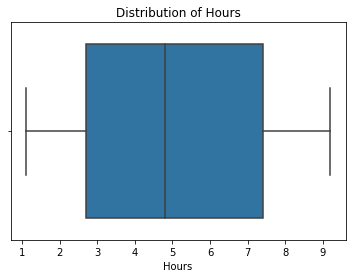

In [60]:
#Checking the outliers in each feature

#plotting a boxplot using seaborn
sns.boxplot(marks.Hours)
plt.title('Distribution of Hours')
plt.show()

##### The scores and hours seems to follow the same trend

#### Bivariate Analysis

<Figure size 1440x720 with 0 Axes>

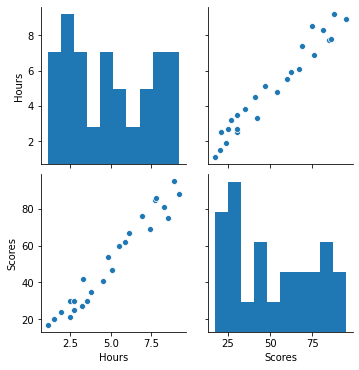

In [55]:
#Plotting a seaborn pairplot for the two variables

sns.pairplot(marks)
plt.show()

In [11]:
#correlation of the features

marks.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


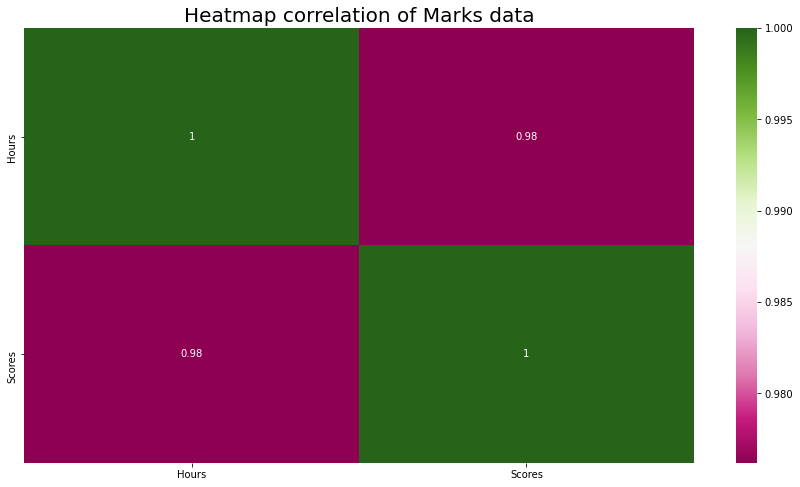

In [63]:
#plotting heatmap using seaborn

plt.figure(figsize=(15,8))
sns.heatmap(marks.corr(), annot=True, cmap='PiYG')
plt.title(label='Heatmap correlation of Marks data',
          fontsize=20)
plt.show()

###### The hours and marks data seem to be linear with each other


#### c. Data Preparation

In [15]:
#dividing the data into inputs and outputs (label)

X=marks.iloc[:,:-1].values
y=marks.iloc[:,-1].values

In [16]:
#splitting data into train and test data

#importing train test library from sklearn

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [17]:
#importing Linear Regression library from sklearn

from sklearn.linear_model import LinearRegression

In [18]:
lr=LinearRegression()

#training the model created

lr.fit(X_train,y_train)

LinearRegression()

##### d. Visualizing the model

<Figure size 432x288 with 0 Axes>

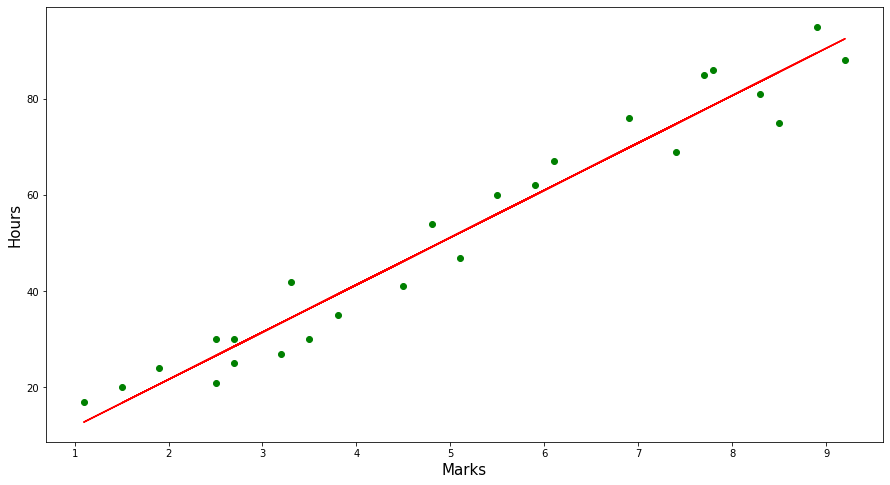

In [64]:
l=lr.coef_*X+lr.intercept_

#plotting the data

fig=plt.figure()

plt.figure(figsize=(15,8))
plt.scatter(X,y,c='g')
fig.suptitle('Marks Vs Hours',fontsize=25)
plt.xlabel('Marks',fontsize=15)
plt.ylabel('Hours',fontsize=15)
plt.plot(X,l,color='r')
plt.show()

##### The plot confirms that it is a best fit line

#### e. Creating Predictions

In [21]:
#predictions for scores

y_pred=lr.predict(X_test)

In [66]:
# a comparison of test and prdicted data

print('y_testdata:',y_test)
print('y_predicted:',y_pred)

y_testdata: [25 35 42 62 20]
y_predicted: [28.54512294 39.36411177 34.44638957 60.01854497 16.74258969]


##### The data seems to be almost same with less errors

In [67]:
#Renaming the columns for a better check

data=pd.DataFrame({'Predicted data':y_pred,'Actual data':y_test})
data

,Predicted data,Actual data
0,28.545123,25
1,39.364112,35
2,34.446390,42
3,60.018545,62
4,16.742590,20


<Figure size 432x288 with 0 Axes>

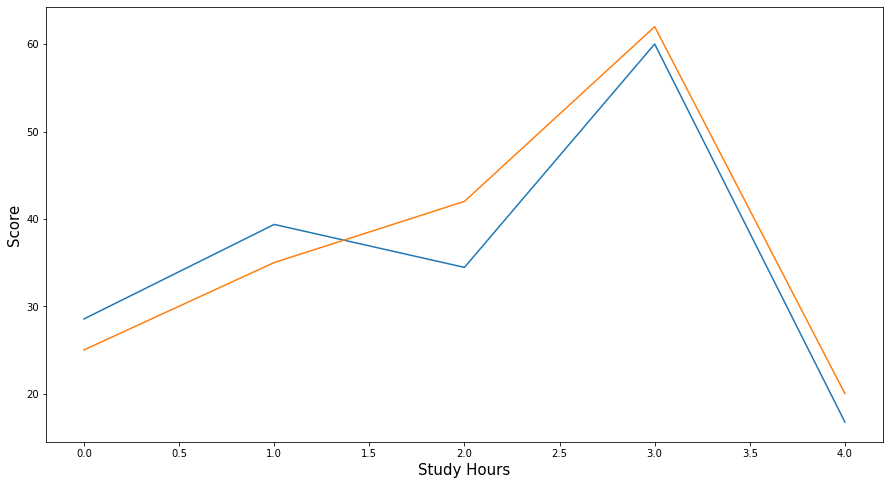

In [70]:
#a comparitive study of predicted and actual data

fig=plt.figure()

plt.figure(figsize=(15,8))
plt.plot(data)
fig.suptitle('Actual and Predicted',fontsize=25)
plt.xlabel('Study Hours',fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.show()

##### It was asked to predict the score of the student if he/she studies 9.25 hours per day

In [81]:
#Testing the given data

hours = 9.25 #hours

#predicting the scores

Predict_val=lr.predict ([[hours]])

print('The predicted marks for a student who studies 9.25 hours/day is:', Predict_val[0])


The predicted marks for a student who studies 9.25 hours/day is: 92.96728365185982


In [83]:
#finding the R squared value

r2= lr.score(X_train,y_train)

print('The R squared value is:', r2*100)

The R squared value is: 95.19568836485192


##### The value is a good score

In [84]:
# checking Error values

#importing library for mse

from sklearn.metrics import mean_squared_error as mse

res = mse(y_test,y_pred)

print('The mean squared error for the model is:', res)

The mean squared error for the model is: 20.641456931253995


# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- The End--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------